<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/SciPy_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import integrate, interpolate
from scipy.optimize import leastsq, minimize_scalar
import matplotlib.pyplot as plt

# Task 2

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).\
**`Примем, что`** \

> **S(t)+I(t)+R(t)=N** \

**Числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов:**

> **dt/dS = −αS**

**Cкорость изменения инфицированных индивидов:** \

> **dt/dI = αS−βI**

**Скорость изменения числа выздоравливающих индивидов:** \

> **dt/dR = βI**

Постоянные пропорциональности **α** и **β** называют коэффициентами заболеваемости и выздоровления соответственно. \
**`Примем, что:`**

1. α = 0.5
2. β = 0.3
3. N = 1 000 000
4. S(0) = 990 000
5. I(0) = 7 000
6. R(0) = 3 000
7. t_0, t_f = 0, 25

**`Необходимо методом наименьших квадратов:`** \
1. для набора данных графика функции S(t) получить уравнение вида S(t)=S0e^−αt
2. для набора данных графика функции I(t) получить уравнение вида I(t)=(I0+αS0*t)e^−αt

**`Для уравнения R(t) график функции будет R(t) = N - S(t) - I(t)`** \
1. Построить все три графика S(t), I(t) и R(t) на одной области отображения полученные методом наименьших квадратов
2. Найти время t_max при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

In [ ]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25


In [ ]:
def st(t, alpha):
  return S* np.exp(-alpha * t)

def diff_st(alpha, y, t):
  return y - st(t, alpha)

def it(t, alpha):
  return I + alpha * S * t * np.exp(-alpha * t)

def diff_it(alpha, y, t):
  return y - it(t, alpha)

In [ ]:
t = np.linspace(t0, tf, 100)

y1 = np.array(S * np.exp(-alpha * t))
aprx, _ = leastsq(diff_st, (0.5,), args=(y1, t))
y1_apx = S * np.exp(-aprx * t)

y2 = np.array(I + alpha * S * t * np.exp(-alpha * t))
aprx1, _ = leastsq(diff_it, (0.5,), args=(y2, t))
y2_apx = I + alpha * S * t * np.exp(-aprx1 * t)

y3 = np.array(N - y1 - y2 )
y3_apx = N - y1_apx - y2_apx


In [169]:
result = minimize_scalar(lambda t, alp: -it(t, alp), bracket=(0, 10), args=(aprx1, ))

t_max = np.round(result['x'][0], 2)
infected = np.round(it(result.x, aprx1)[0], 2)

result

     fun: array([-371200.64675973])
    nfev: 18
     nit: 14
 success: True
       x: array([2.00000001])

In [168]:
print(f'Время t_max при котором число инфекционных индивидов максимально:\nt_max: {t_max}\ninfected: {infected} ')

Время t_max при котором число инфекционных индивидов максимально:
t_max: 2.0
infected: 371200.65 


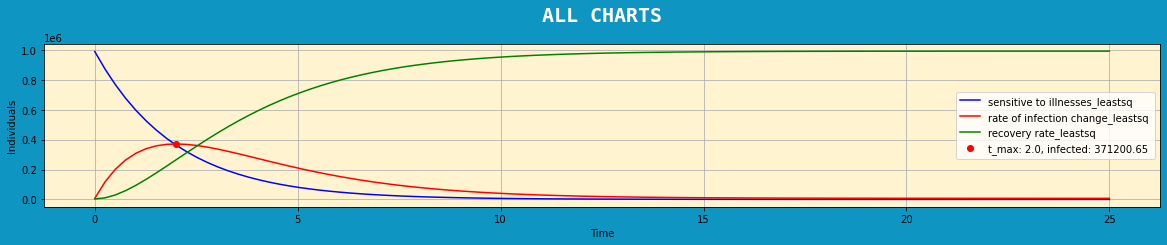

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('ALL CHARTS', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)
ax.set_xlabel('Time')
ax.set_ylabel('Individuals')
# ax.set_xticks(t)

plt.plot(t, y1_apx, 'b', label='sensitive to illnesses_leastsq', linestyle = "-")
plt.plot(t, y2_apx, 'r', label='rate of infection change_leastsq', linestyle = "-")
plt.plot(t, y3_apx, 'g', label='recovery rate_leastsq', linestyle = "-")
plt.plot(result['x'], it(result['x'],aprx1), 'ro', label=f't_max: {t_max}, infected: {infected} ')


plt.grid()
plt.legend()
plt.show()